In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
brecaHAD_dataset = "/content/drive/MyDrive/7379186.zip"
!unzip /content/drive/MyDrive/7379186.zip -d brechaHD/

Archive:  /content/drive/MyDrive/7379186.zip
replace brechaHD/original.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#import os
#if not os.dir()
!mkdir brechaHD/

mkdir: cannot create directory ‘brechaHD/’: File exists


In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=493e1784f16e54f65343664e86e6ba1ea79adacd181123baf08d6dcc192254ef
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Gen RAM Free: 12.5 GB  | Proc size: 95.6 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


In [ ]:
!mkdir brecha_images_labels

In [ ]:
!unzip /content/brechaHD/BreCaHAD.zip -d brecha_images_labels/

Archive:  /content/brechaHD/BreCaHAD.zip
  inflating: brecha_images_labels/LICENSE  
  inflating: brecha_images_labels/README.md  
   creating: brecha_images_labels/images/
  inflating: brecha_images_labels/images/Case_1-01.tif  
  inflating: brecha_images_labels/images/Case_1-02.tif  
  inflating: brecha_images_labels/images/Case_1-03.tif  
  inflating: brecha_images_labels/images/Case_1-04.tif  
  inflating: brecha_images_labels/images/Case_1-05.tif  
  inflating: brecha_images_labels/images/Case_1-06.tif  
  inflating: brecha_images_labels/images/Case_1-07.tif  
  inflating: brecha_images_labels/images/Case_1-08.tif  
  inflating: brecha_images_labels/images/Case_10-01.tif  
  inflating: brecha_images_labels/images/Case_10-02.tif  
  inflating: brecha_images_labels/images/Case_10-03.tif  
  inflating: brecha_images_labels/images/Case_10-04.tif  
  inflating: brecha_images_labels/images/Case_10-05.tif  
  inflating: brecha_images_labels/images/Case_10-06.tif  
  inflating: brecha_ima

In [ ]:
from pathlib import Path
brecha_images = Path("/content/brecha_images_labels/images")
brecha_labels = Path("/content/brecha_images_labels/groundTruth")
from PIL import Image
from pathlib import Path
sample_image = Path(brecha_images)/ "Case_1-01.tif"
sample_label = Path(brecha_labels)/ "Case_1-01.json"
#im = Image.open(Path("C:/Users/Noman/Desktop/Project_deep_learning/images/Case_1-01.tif"))
image = 0
label = 0
for labels,images in zip(brecha_labels.glob('*'),brecha_images.glob('*')):
    if labels:
        label += 1
    if images:
        image += 1
print(image)
print(label)

162
162


In [ ]:
import numpy as np 
from PIL import Image
sample_image1 = Image.open(sample_image)
imarray = np.array(sample_image1)
#imarray.shape
imarray.shape

(1024, 1360, 3)

In [ ]:
sample_label

PosixPath('/content/brecha_images_labels/groundTruth/Case_1-01.json')

In [ ]:
# read json file in python
import json

with open(sample_label) as f:
  data = json.load(f)

print(data["tumor"])


[{'x': 0.08808104886769964, 'y': 0.30274135876042907}, {'x': 0.053978826333870855, 'y': 0.2598331346841478}, {'x': 0.08718362195891467, 'y': 0.2359952324195471}, {'x': 0.05218397251630092, 'y': 0.22526817640047675}, {'x': 0.05667110706022576, 'y': 0.3456495828367104}, {'x': 0.14192666339479773, 'y': 0.29916567342073896}, {'x': 0.14461894412115264, 'y': 0.3230035756853397}, {'x': 0.12397812521909837, 'y': 0.2526817640047676}, {'x': 0.08808104886769964, 'y': 0.041716328963051254}, {'x': 0.0638505223305055, 'y': 0.03933253873659118}, {'x': 0.04769683797237608, 'y': 0.0631704410011919}, {'x': 0.10064502559068919, 'y': 0.07270560190703218}, {'x': 0.12936268667180817, 'y': 0.06793802145411204}, {'x': 0.1544906401177873, 'y': 0.04052443384982122}, {'x': 0.17333660520227162, 'y': 0.1835518474374255}, {'x': 0.15718292084414218, 'y': 0.22288438617401668}, {'x': 0.18859286265161607, 'y': 0.27771156138259834}, {'x': 0.21910537755030499, 'y': 0.19308700834326578}, {'x': 0.24872046554020893, 'y': 0.

In [ ]:
brecha_labels

PosixPath('/content/brecha_images_labels/groundTruth')

In [ ]:
import json
import numpy as np
inner_list = []
outer_list = []
for i in brecha_labels.glob("*"):
  inner_list = []
  with open(i) as f:
    data = json.load(f)
  tumor = data['tumor']
  non_lumen = data['non_lumen']
  for point in tumor:
    for key,value in point.items():
      inner_list.append(value)
  outer_list.append(inner_list)

lenght_array = []
for i in outer_list:
  length = len(i)
  lenght_array.append(length)

print(lenght_array)

[176, 138, 172, 338, 228, 318, 238, 206, 0, 190, 294, 254, 230, 380, 176, 196, 254, 360, 322, 244, 386, 306, 328, 282, 180, 316, 266, 110, 332, 224, 128, 242, 224, 166, 226, 238, 280, 490, 226, 222, 296, 346, 236, 246, 336, 358, 126, 232, 260, 326, 232, 282, 158, 310, 288, 246, 162, 226, 224, 238, 308, 352, 0, 192, 490, 48, 290, 268, 220, 306, 202, 324, 392, 232, 190, 194, 176, 178, 270, 208, 318, 202, 256, 352, 292, 188, 238, 252, 292, 202, 144, 210, 180, 366, 174, 288, 282, 266, 272, 98, 218, 142, 320, 556, 290, 290, 246, 412, 200, 396, 216, 78, 232, 108, 238, 212, 228, 166, 270, 280, 202, 54, 194, 278, 226, 196, 184, 298, 236, 210, 268, 230, 348, 246, 278, 238, 396, 246, 336, 118, 204, 178, 302, 368, 140, 90, 430, 468, 160, 202, 324, 252, 174, 448, 372, 194, 184, 242, 278, 182, 386, 126]


In [ ]:

max(lenght_array)

556

In [ ]:
min(lenght_array)

0

In [ ]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in lenght_array:
  if i < 100:
    count1 += 1
  elif i > 100 and i < 200:
    count2 += 1
  elif i > 200 and i < 300:
    count3 += 1
  elif i > 300 and i < 400:
    count4 += 1
  else:
    count5 +=1

print(count1)
print(count2)
print(count3)
print(count4)
print(count5)



7
37
77
33
8


In [ ]:
labels = outer_list

In [ ]:
import numpy as np
labels = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
a = outer_list
import numpy as np
b = np.zeros([len(a),len(max(a,key = lambda x: len(x)))])
for i,j in enumerate(a):
    b[i][0:len(j)] = j

In [ ]:
labels = b # labels of images


In [ ]:
labels.shape

(162, 556)

In [ ]:
brecha_images

PosixPath('/content/brecha_images_labels/images')

In [ ]:
images = []
for image in brecha_images.glob('*'):
  imarray = []
  image = Image.open(image)
  imarray = np.array(sample_image1)
  images.append(imarray)

In [ ]:
np_images = np.array(images)

In [ ]:
for image in np_images:
  print(image.shape)
  break

(1024, 1360, 3)


<class 'torch.Tensor'>
torch.Size([162, 1024, 1360, 3])
torch.Size([162, 3, 1024, 1360])


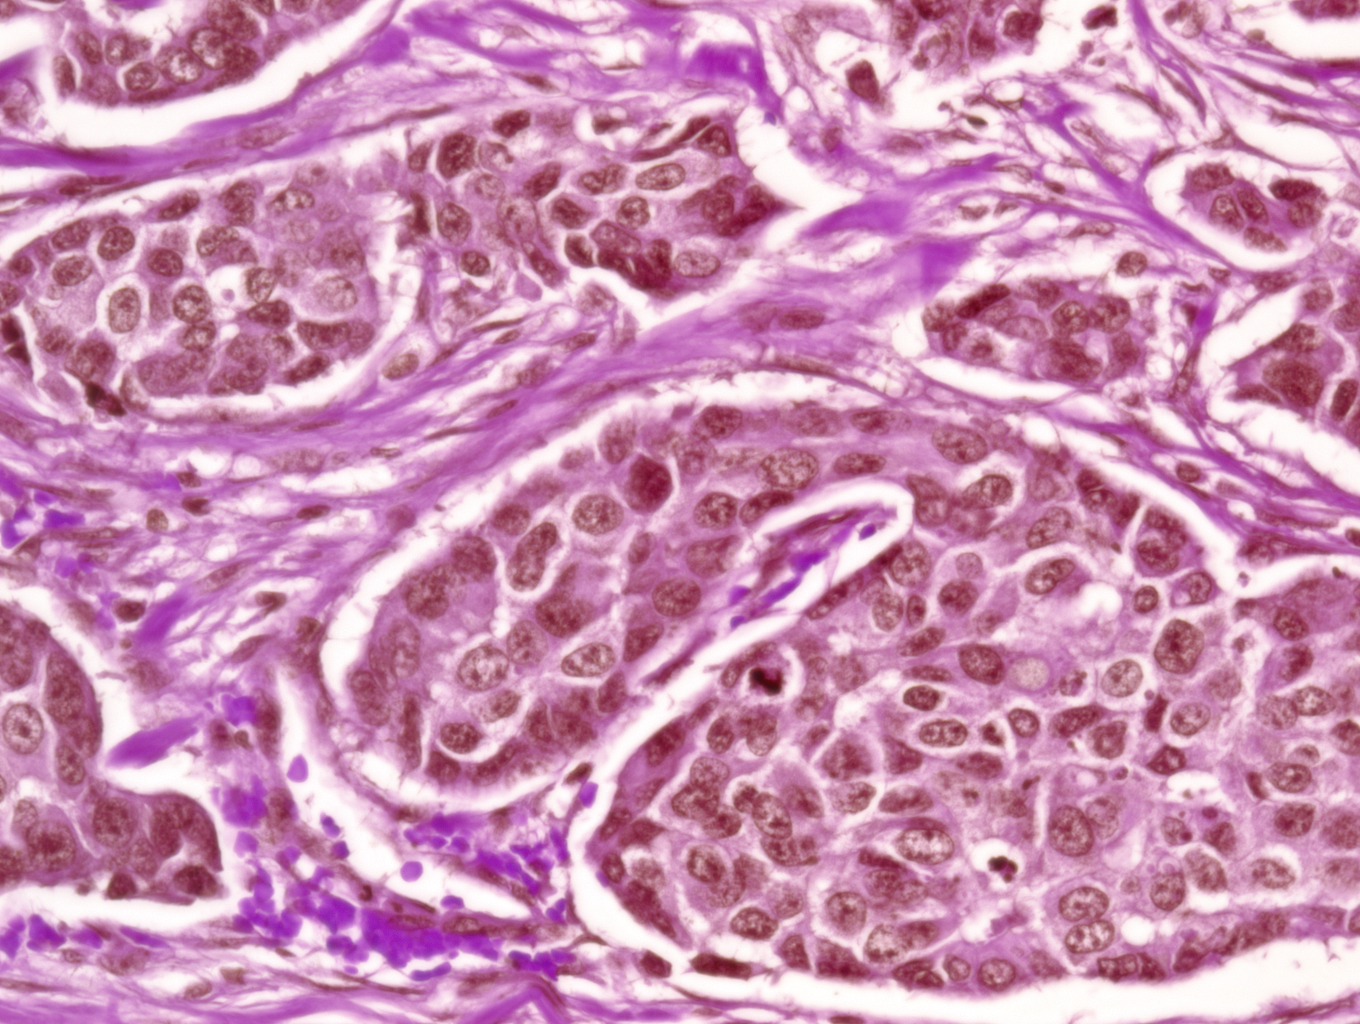

torch.Size([3, 1024, 1360])


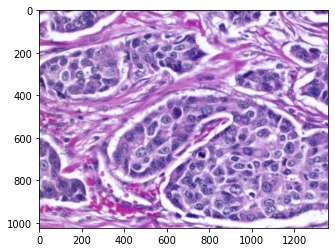

In [ ]:
np_labels = labels
import torch
dummy = np_images
dummy = torch.tensor(dummy)
print(type(dummy))
print(dummy.shape)
dummy = dummy.permute(0, 3,1,2)
print(dummy.shape)
dummy[0].shape

from matplotlib import pyplot as plt

plt.imshow(np_images[0])
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(np_images[0])

print(dummy[0].shape)

In [ ]:
np_labels.shape

In [ ]:
np_labels[0]
np_images[0]

In [ ]:
# Lets import some libraries 
import torch # PyTorch 
from torchvision import datasets # Datasets module 
import torchvision.transforms as transforms # Image Transforms 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 

In [ ]:
np_labels[0][0]
np_images[0][0]
np_labels[100]

In [ ]:
from torch.utils.data import Dataset
import torch

class BrecaHAD(Dataset):
  def __init__(self, data, labels,transform = None):
    self.data = data
    self.labels = labels
    self.transform = transform
#[h,w,c]
#[0,1,2]
#[c,h,w]
#[2,0,1]
  def __len__(self):
    return labels.shape[0]
  def __getitem__(self, index):
    img = self.data[index]
    img = torch.tensor(img)
    #img = img[None,:]
    img = img.permute(2,0,1)
    label = self.labels[index]
    label = torch.tensor(label)
    #c = a.to(torch.float32)
    img = img.to(torch.float32)
    label = label.to(torch.float32)
    return (img, label)

In [ ]:
# Creating Model 

import torch.nn as nn
import torchvision.models as models
import torch
import torch.nn as nn
import torch.nn.functional as F

        

In [ ]:
"""
from torch import nn


class RNN(nn.Module):
    def __init__(self, input_size=28):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(
            input_size=input_size,
            hidden_size=,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        r_out, (_, _) = self.rnn(x, None)
        out = self.out(r_out[:, -1, :])
        return out
        """

'\nfrom torch import nn\n\n\nclass RNN(nn.Module):\n    def __init__(self, input_size=28):\n        super(RNN, self).__init__()\n\n        self.rnn = nn.LSTM(\n            input_size=input_size,\n            hidden_size=,\n            num_layers=1,\n            batch_first=True,\n        )\n        self.out = nn.Linear(64, 10)\n\n    def forward(self, x):\n        r_out, (_, _) = self.rnn(x, None)\n        out = self.out(r_out[:, -1, :])\n        return out\n        '

In [ ]:
"""
class trialLSTM(nn.Module):
  def __init__(self, seq_len = , input_size, hidden_size, batch_size, num_layers):
      super(trialLSTM, self).__init__()

      self.seq_len = seq_len
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.batch_size = batch_size
      self.lstm = nn.LSTM(seq_len, batch_size, input_size)

  def init_hidden(self):
      # initialize the hidden state and the cell state to zeros
      hidden = torch.zeros(self.batch_size, self.hidden_size)
      cell = torch.zeros(self.batch_size, self.hidden_size)
      if gpu:
          hidden = hidden.cuda()
          cell = cell.cuda()
      return hidden, cell

  def forward(self, x, (h_0, c_0)):
      # Incoming x is (18,3,128,128)
      #do i need to reshape it to (1, 3, 128, 128)?like so:
      # for i in range(0, 18):
      #    x[i] = x[i].reshape(1, 3, 128, 128)
      # if yes, do I reshape it here or in the training loop?
      output = torch.empty(seq_len-1, seq_len-1, seq_len-1)
      for t in range(seq_len+1):
          if t==0:
              hidden, cell = self.lstm(x[0], (h_0,c_0))
          else:
              hidden, cell = self.lstm(x[t], (h_1,c_1))
              """

'\nclass trialLSTM(nn.Module):\n  def __init__(self, seq_len = , input_size, hidden_size, batch_size, num_layers):\n      super(trialLSTM, self).__init__()\n\n      self.seq_len = seq_len\n      self.input_size = input_size\n      self.hidden_size = hidden_size\n      self.batch_size = batch_size\n      self.lstm = nn.LSTM(seq_len, batch_size, input_size)\n\n  def init_hidden(self):\n      # initialize the hidden state and the cell state to zeros\n      hidden = torch.zeros(self.batch_size, self.hidden_size)\n      cell = torch.zeros(self.batch_size, self.hidden_size)\n      if gpu:\n          hidden = hidden.cuda()\n          cell = cell.cuda()\n      return hidden, cell\n\n  def forward(self, x, (h_0, c_0)):\n      # Incoming x is (18,3,128,128)\n      #do i need to reshape it to (1, 3, 128, 128)?like so:\n      # for i in range(0, 18):\n      #    x[i] = x[i].reshape(1, 3, 128, 128)\n      # if yes, do I reshape it here or in the training loop?\n      output = torch.empty(seq_len-1,

In [ ]:

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(3, 16, 5, 1)
      self.conv2 = nn.Conv2d(16, 32, 5, 1)
      self.conv3 = nn.Conv2d(32,64,5,1)
      self.conv4 = nn.Conv2d(64,128,5,1)
      self.conv5 = nn.Conv2d(128,256,5,1)
      self.conv6 = nn.Conv2d(256,512,5,1)
      self.conv7 = nn.Conv2d(512,1024,5,1)
      
      self.rnn = nn.LSTM(
            input_size=208896,
            hidden_size=128,
            num_layers=1,
            batch_first=True)
      #self.linear = nn.Linear(64, 10)
      #self.dropout1 = nn.Dropout2d(0.25)
      #self.dropout2 = nn.Dropout2d(0.5)
      self.fc1 = nn.Linear(128, 556)

    # x represents our data
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x)
      # Use the rectified-linear activation function over x
      x = F.relu(x)

      x = self.conv2(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)
      x = self.conv3(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)
      x = self.conv4(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)
      x = self.conv5(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)
      x = self.conv6(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)
      x = self.conv7(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2)
      # Pass data through dropout1
      #x = self.dropout1(x)
      # Flatten x with start_dim=1
      x = torch.flatten(x, 1)
      # Pass data through fc1
      x, _ = self.rnn(x)
      x = self.fc1(x)
      x = F.relu(x)
      # Apply softmax to x
      #output = F.log_softmax(x, dim=1)
      output = x
      return output

my_nn = Net()
print(my_nn)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1))
  (conv7): Conv2d(512, 1024, kernel_size=(5, 5), stride=(1, 1))
  (rnn): LSTM(208896, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=556, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from tqdm import tqdm
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = 50
learning_rate = 0.001
train_CNN = False
batch_size = 4
shuffle = True
pin_memory = True
num_workers = 1

transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )



In [ ]:

len(np_images)
len(np_images[0:120])

120

In [ ]:
train_data_set = BrecaHAD(np_images,np_labels, transform = transform )
train_loader = DataLoader(train_data_set, batch_size=batch_size, shuffle=True)

test_data_set = BrecaHAD(np_images[120:162],np_labels[120:162], transform = transform )
test_loader = DataLoader(test_data_set, batch_size=1, shuffle=False)

In [ ]:
it = iter(train_loader)
first = next(it)
print((first[0][0]))
second = next(it)
#print(second)

In [ ]:
model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def check_accuracy(loader, model):
    if loader == train_loader:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on validation data")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            predictions = torch.tensor([1.0 if i >= 0.5 else 0.0 for i in scores]).to(device)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
    return f"{float(num_correct)/float(num_samples)*100:.2f}"
    print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
    model.train()

In [ ]:
def save_checkpoint(state, filename):
  print("saving checkpoint")
  torch.save(state, filename)


import tqdm
def train():
    model.train()
    loss = 0
    for epoch in range(num_epochs):
        loop = train_loader
        losses = []
        print("epoch :", epoch)
        if loss !=0:
          print("loss :" , loss )
        print("")
        if epoch % 5 == 0:
          checkpoint = {
                'state_dict' : model.state_dict(),
                'optimizer' : optimizer.state_dict()
            }
          save_checkpoint(checkpoint, filename = "/content/drive/MyDrive/rnn_checkpoints/my_checkpoint_" + str(epoch) + ".pth.tar")
        #if epoch % 2 == 0:
        #    loop.set_postfix(val_acc = check_accuracy(test_loader, model))
        for imgs, labels in loop:
            imgs = imgs.to(device)
            #print(imgs)
            labels = labels.to(device)
            outputs = model(imgs/255)
            #print(outputs.dtype)
            #print(labels.dtype)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
         #   loop.set_description(f"Epoch [{epoch}/{num_epochs}]")
          #  loop.set_postfix(loss = loss.item())

if __name__ == "__main__":
    train()



In [ ]:
# Specify a path
import torch
PATH = "/content/drive/MyDrive/rnn_checkpoints/my_checkpoint_20.pth.tar"
net = Net()
# Save
torch.save(net.state_dict(), PATH)

# Load
model = Net()
model.load_state_dict(torch.load(PATH))
print(model.state_dict())
model.eval()
out = model(sample)
#checkpoint = torch.load(PATH)
#model.load_state_dict(checkpoint['state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
for param in model.parameters():
  print(param)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf "/content/drive/MyDrive/rnn_checkpoints/my_checkpoint_15.pth.tar" -C "/content/drive/MyDrive/rnn_weights"     #[run this cell to extract tar files]

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
